In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from data_cracker import GTUtility

gt_util_cr = GTUtility('data/KSIGNBOARD/')
print(gt_util_cr)

Background              0
Text                 3972

images               1085
objects              3972
per image            3.66
no annotation           0



/home/ina/anaconda3/envs/ina/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:768: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41493
  " Skipping tag %s" % (size, len(data), tag))
/home/ina/anaconda3/envs/ina/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:768: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag))


In [2]:
from data_KSign import GTUtility

gt_util_ai_cr = GTUtility('data/K-SIGN/Annotation/', quality = 'cr')
gt_util_high = GTUtility('data/K-SIGN/HighQuality/', quality = 'high')
print(gt_util_ai_cr)
print(gt_util_high)

Background              0
Text                  299

images                155
objects               299
per image            1.93
no annotation           0

Background              0
Text                  669

images                321
objects               669
per image            2.08
no annotation           0



In [3]:
gt_util = gt_util_high.merge(gt_util_ai_cr)
gt_util_merge = gt_util.merge(gt_util_cr)
print(gt_util_merge)

Background              0
Text                 4940

images               1561
objects              4940
per image            3.16
no annotation           0



In [15]:
import pickle
with open('gt_util_cocotext_train.pkl', 'rb') as f:
    gt_util_train = pickle.load(f)
    
with open('gt_util_cocotext_val.pkl', 'rb') as f:
    gt_util_val = pickle.load(f)

In [16]:
gt_util_merge = gt_util_val

In [18]:
gt_util_merge = gt_util_train.merge(gt_util_val)

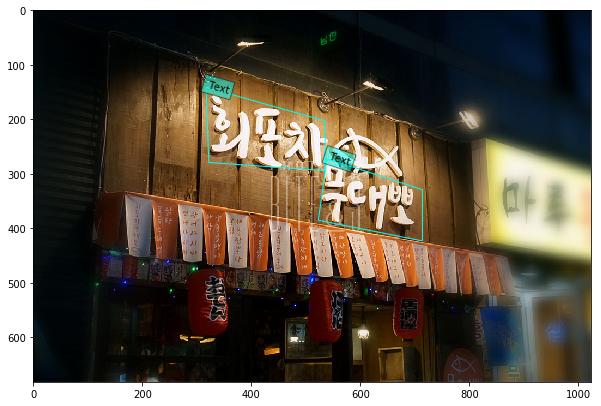

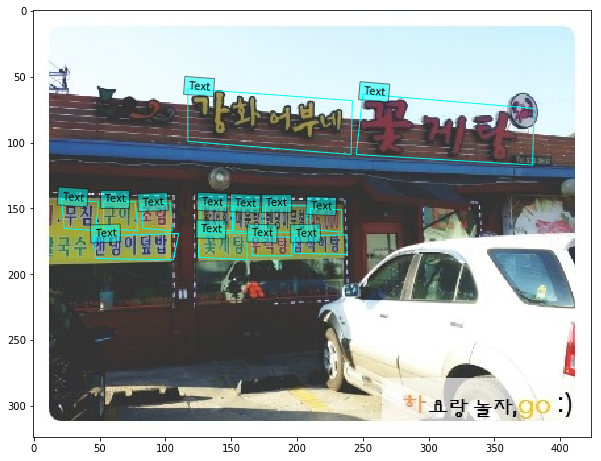

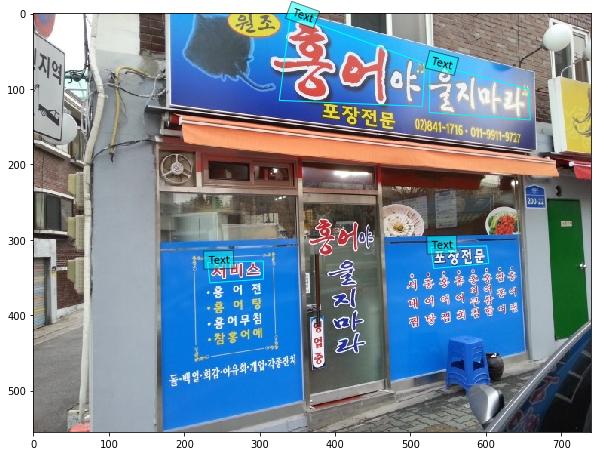

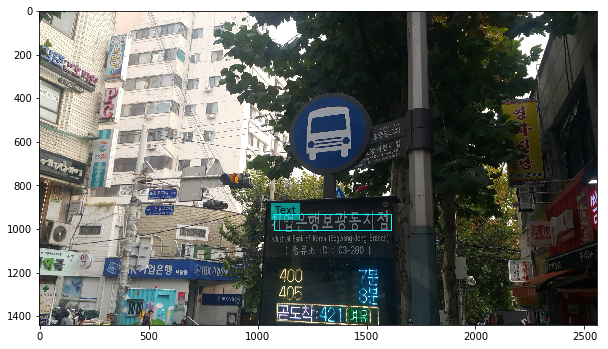

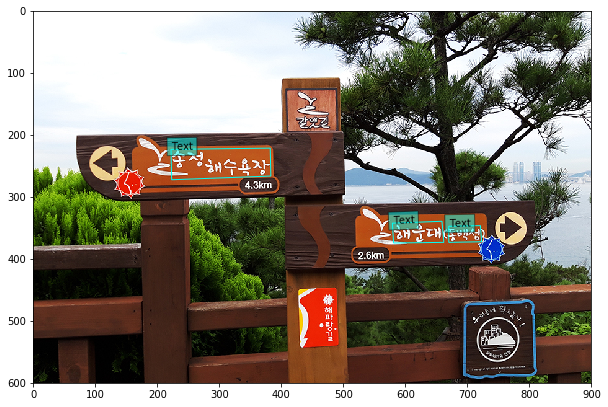

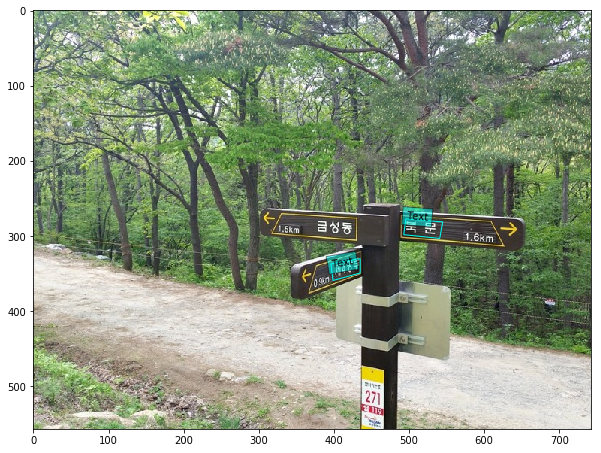

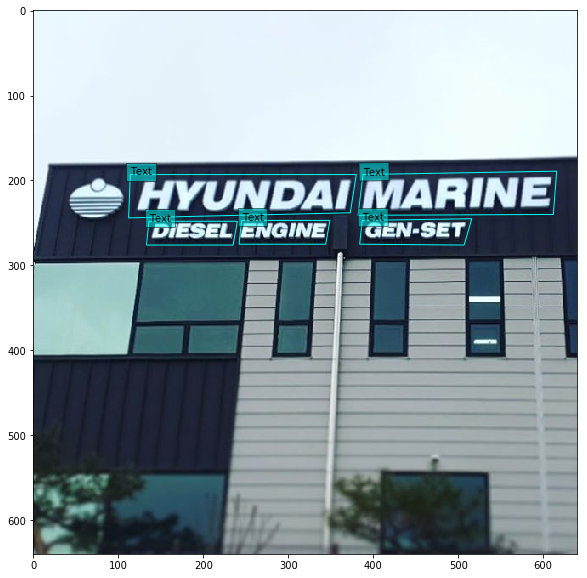

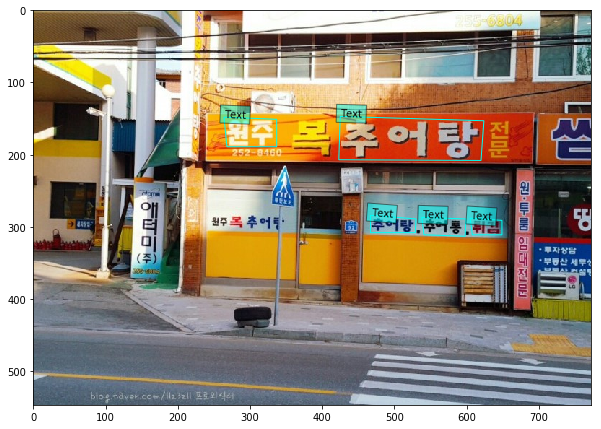

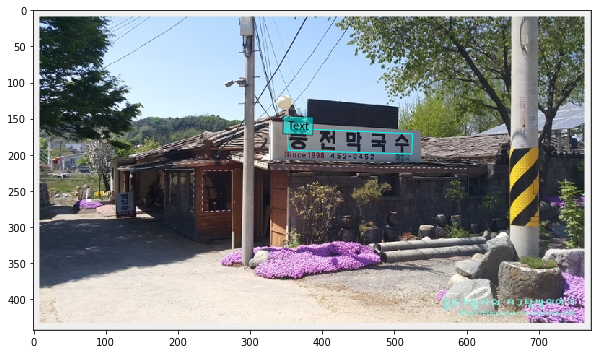

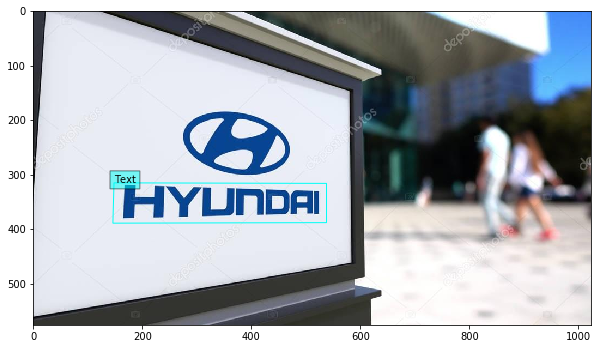

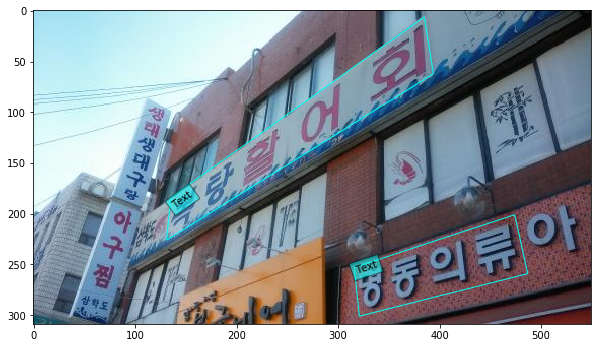

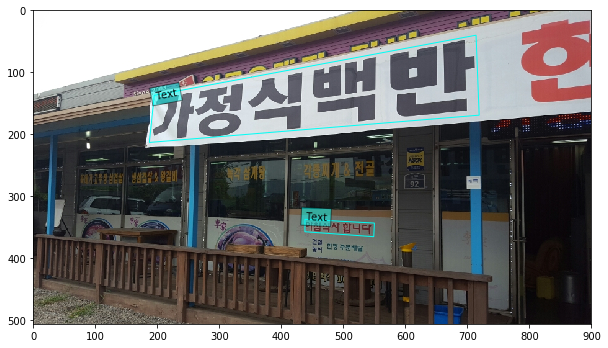

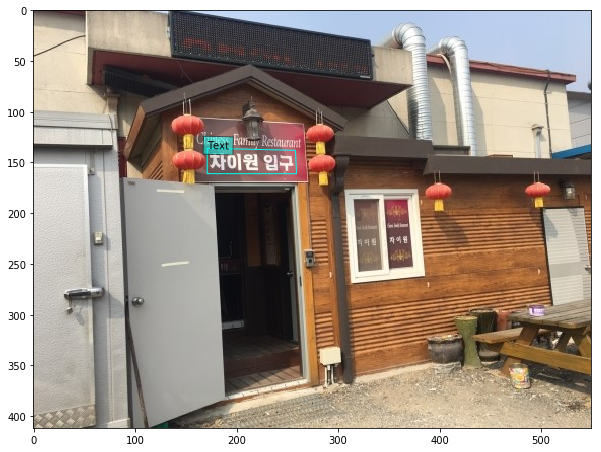

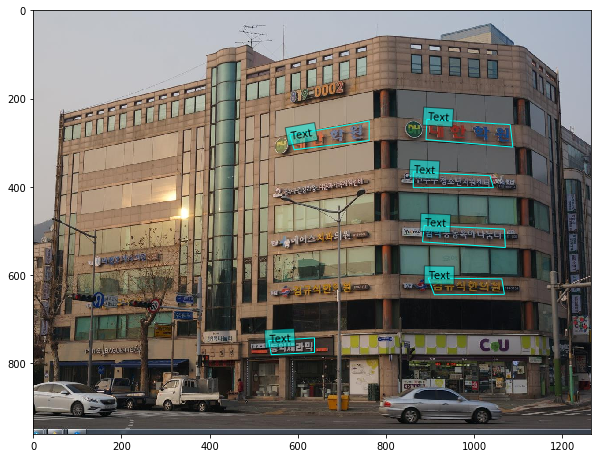

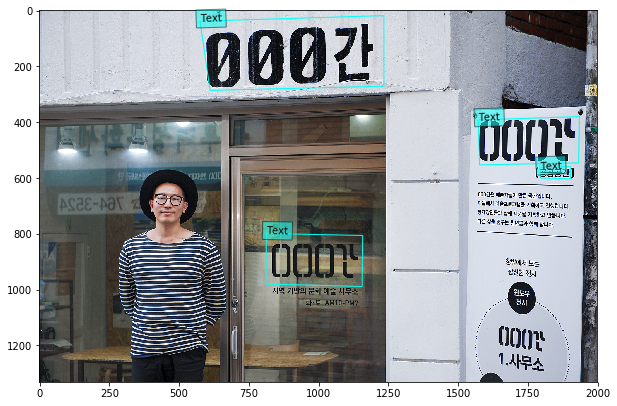

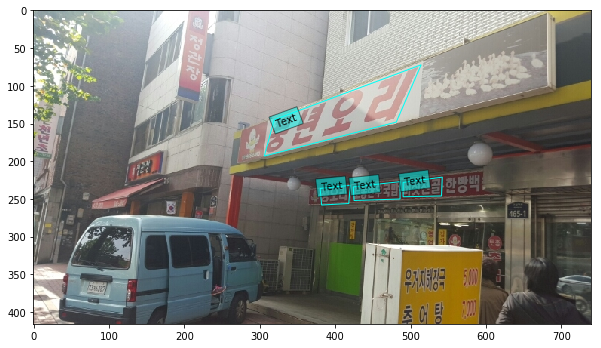

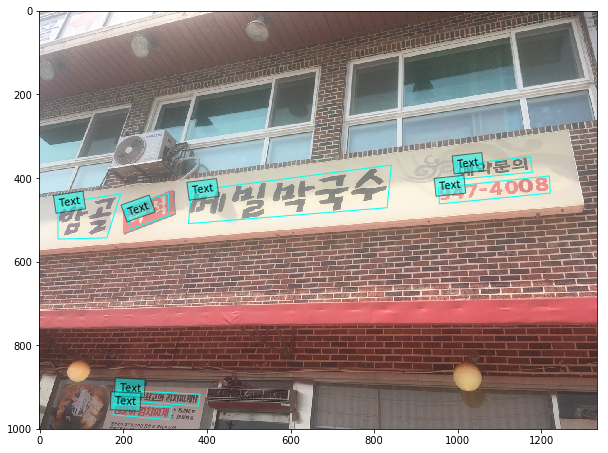

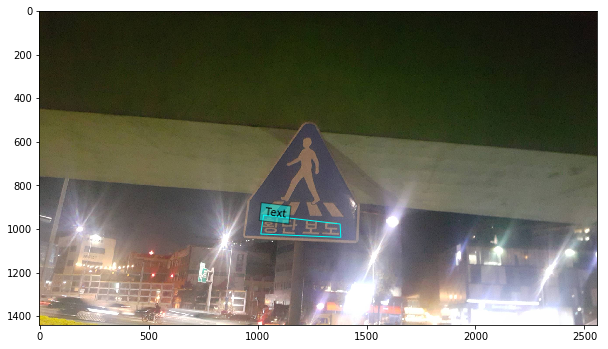

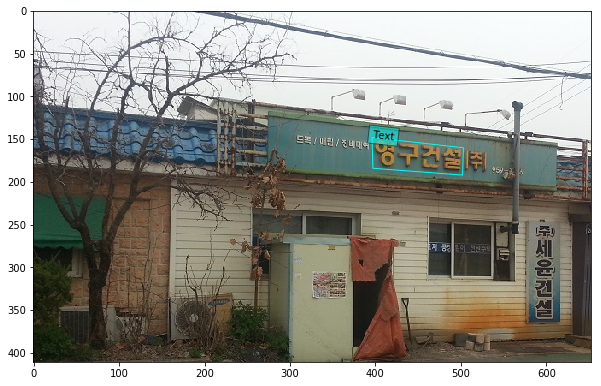

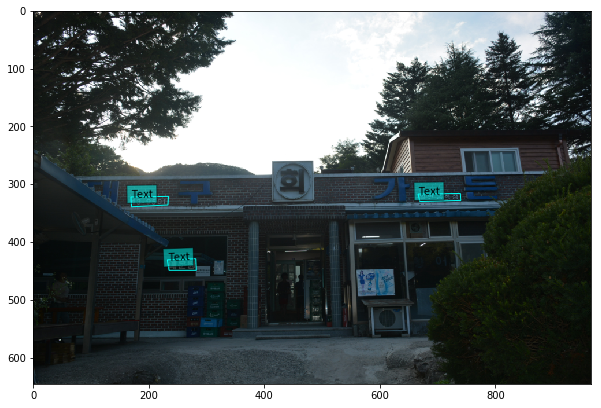

In [6]:
for idx in range(20):
    idx, img, gt = gt_util_merge.sample()
    plt.figure(figsize=[10]*2)
    plt.imshow(img)
    gt_util_merge.plot_gt(gt, show_labels=True)
    plt.show()

In [14]:
import pickle
file_name = 'gt_util_final_data.pkl'
pickle.dump(gt_util_merge, open(file_name,'wb'))